In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Goal is to cluster the data and treat them as individual datasets to train, Regression models to predict ‘mpg’

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 3. Identify and separate the data into different clusters (10 points)  

1. Use Machine Learning algorithms like K Means or Hierarchical  clustering to find out the optimal number of clusters in the data.  

2. Share your insights about the difference in using these two  methods. 

In [3]:
mpg_df = pd.read_csv('cars_original.csv')
mpg_df_treated = pd.read_csv('cars_treated.csv') # Transformed and Scaled data
mpg_df_cluster = pd.DataFrame.copy(mpg_df_treated) 
mpg_df_cluster.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,1.437509,1.137909,0.822846,0.730485,-1.352629,-1.668157,-0.628218
1,1.437509,1.385691,1.525430,0.917911,-1.584805,-1.668157,-1.159014
2,1.437509,1.204442,1.244421,0.660568,-1.826459,-1.668157,-0.628218
3,1.437509,1.119350,1.244421,0.657452,-1.352629,-1.668157,-0.971762
4,1.437509,1.106877,1.041115,0.674041,-2.078400,-1.668157,-0.795216


In [4]:
mpg_df_cluster.shape

(398, 7)

In [5]:
mpg_df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null float64
disp    398 non-null float64
hp      398 non-null float64
wt      398 non-null float64
acc     398 non-null float64
yr      398 non-null float64
mpg     398 non-null float64
dtypes: float64(7)
memory usage: 21.9 KB


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

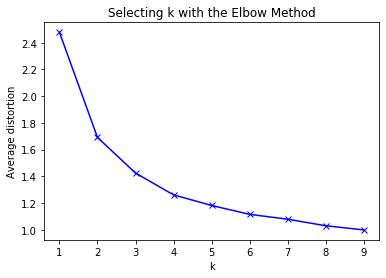

In [6]:
# Create K Means cluster and store the result in the object k_means
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
wss =[]
clusters=range(1,10)
for k in clusters:
    mpg_model=KMeans(n_clusters=k, random_state=10)
    mpg_model.fit(mpg_df_cluster)
    prediction=mpg_model.predict(mpg_df_cluster)
    wss.append(sum(np.min(cdist(mpg_df_cluster, mpg_model.cluster_centers_, 'euclidean'), axis=1)) / mpg_df_cluster.shape[0])
# Elbow plot to identify the Optimal clusters where there is sharp decline in the SSE
plt.plot(clusters, wss, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

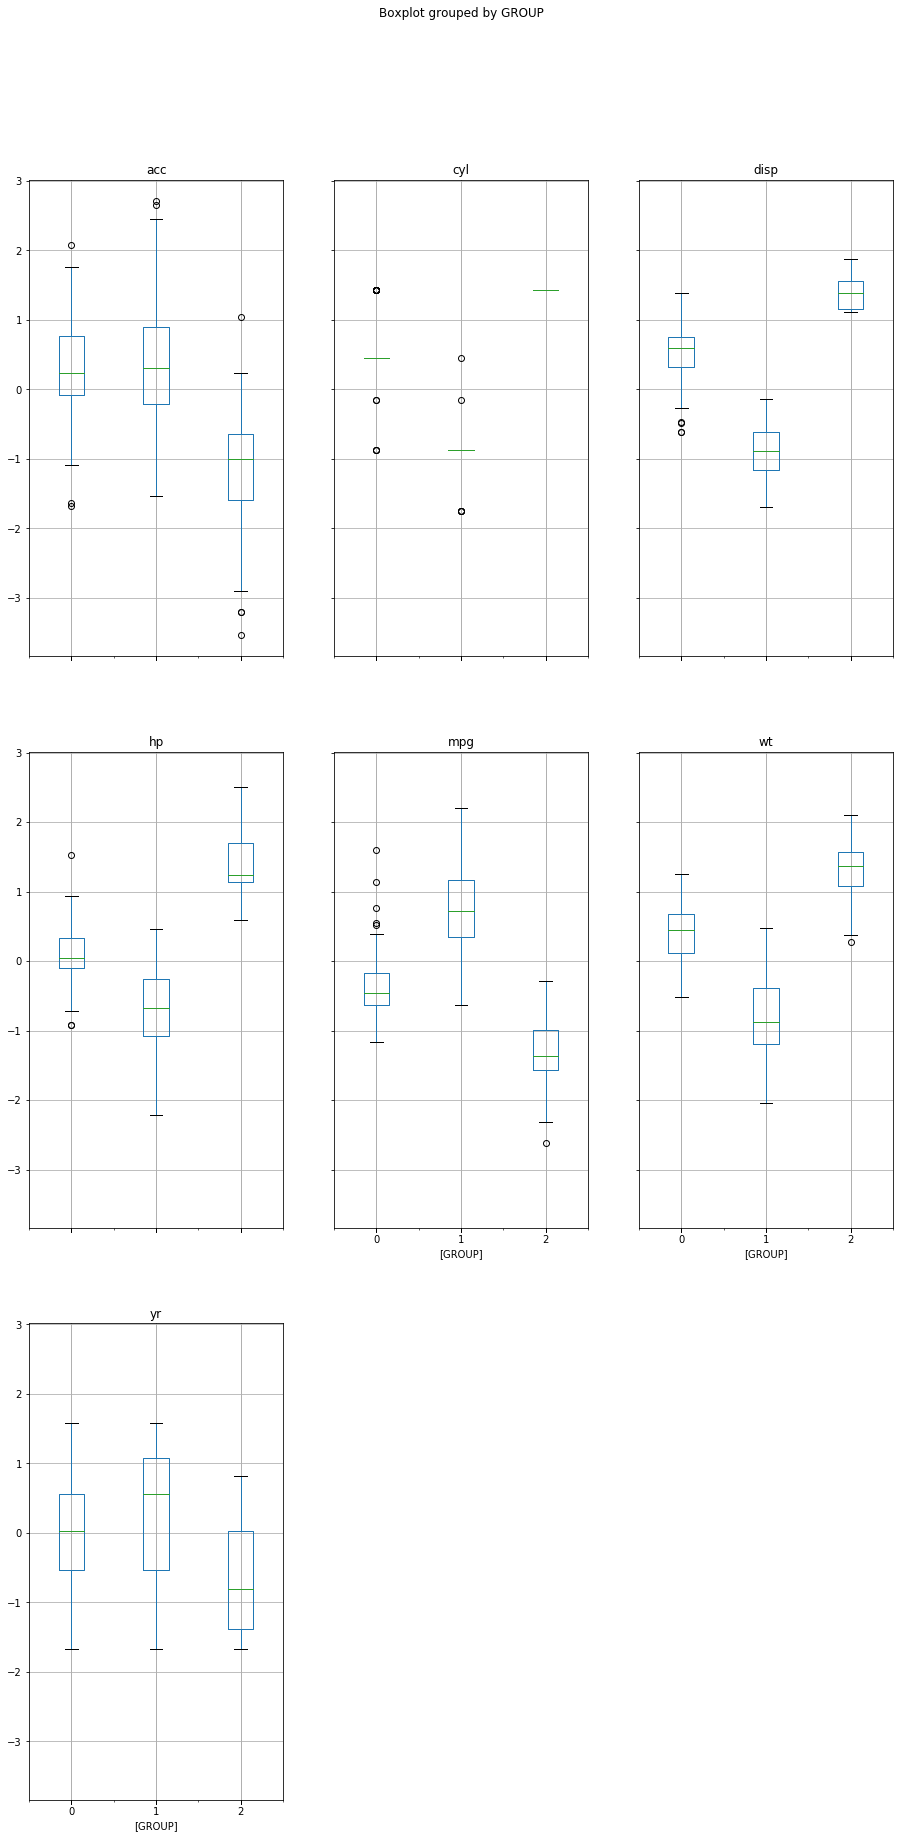

In [7]:
# The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters
# Let us start with 3 clusters
# Create K Means cluster and store the result in the object k_means
final_model=KMeans(3,random_state = 10)
# Fit K means on the scaled dataframe
final_model.fit(mpg_df_cluster)
prediction=final_model.predict(mpg_df_cluster)
mpg_df_cluster["GROUP"] =  prediction
mpg_df_cluster.boxplot(by = 'GROUP',  figsize=(15, 30))
mpg_df['GROUP'] = prediction

In [8]:
mpg_df_cluster.GROUP.value_counts().sort_index()

0     97
1    207
2     94
Name: GROUP, dtype: int64

In [9]:
clust_profile=mpg_df.groupby('GROUP').mean()
clust_profile['freq']=mpg_df.GROUP.value_counts().sort_index()
clust_profile

,cyl,disp,hp,wt,acc,yr,mpg,freq
GROUP,,,,,,,,
0,6.103093,221.618557,102.974227,3234.721649,16.292784,76.092784,19.954639,97
1,3.995169,109.094203,78.548309,2307.299517,16.586957,77.125604,29.308213,207
2,8.000000,350.042553,162.393617,4157.978723,12.576596,73.468085,14.429787,94


In [10]:
# Observations: 
# Group 0 on an average has over 5 cylinders, higher acceleration, higher displacement than small cars and lesser than SUV, 
# higher horsepower than small cars and lesser than SUV, moderate weight and higher mpg than SUV  
# and most of them were manufactured after year '76 - SEDAN cars 

# Group 1 on an average has around 4 cylinders, highest acceleration, lowest displacement, lowest horsepower, 
# lowest wt and highest mpg and most of them were manufactured after year '77 - SMALL Cars

# Group 2 on an anverage has around 8 cylinders lowest acceleration, highest displacement, highest horsepower, 
# heaviest and lowest mpg and manufactured as early as year '73- SUV/Luxury cars

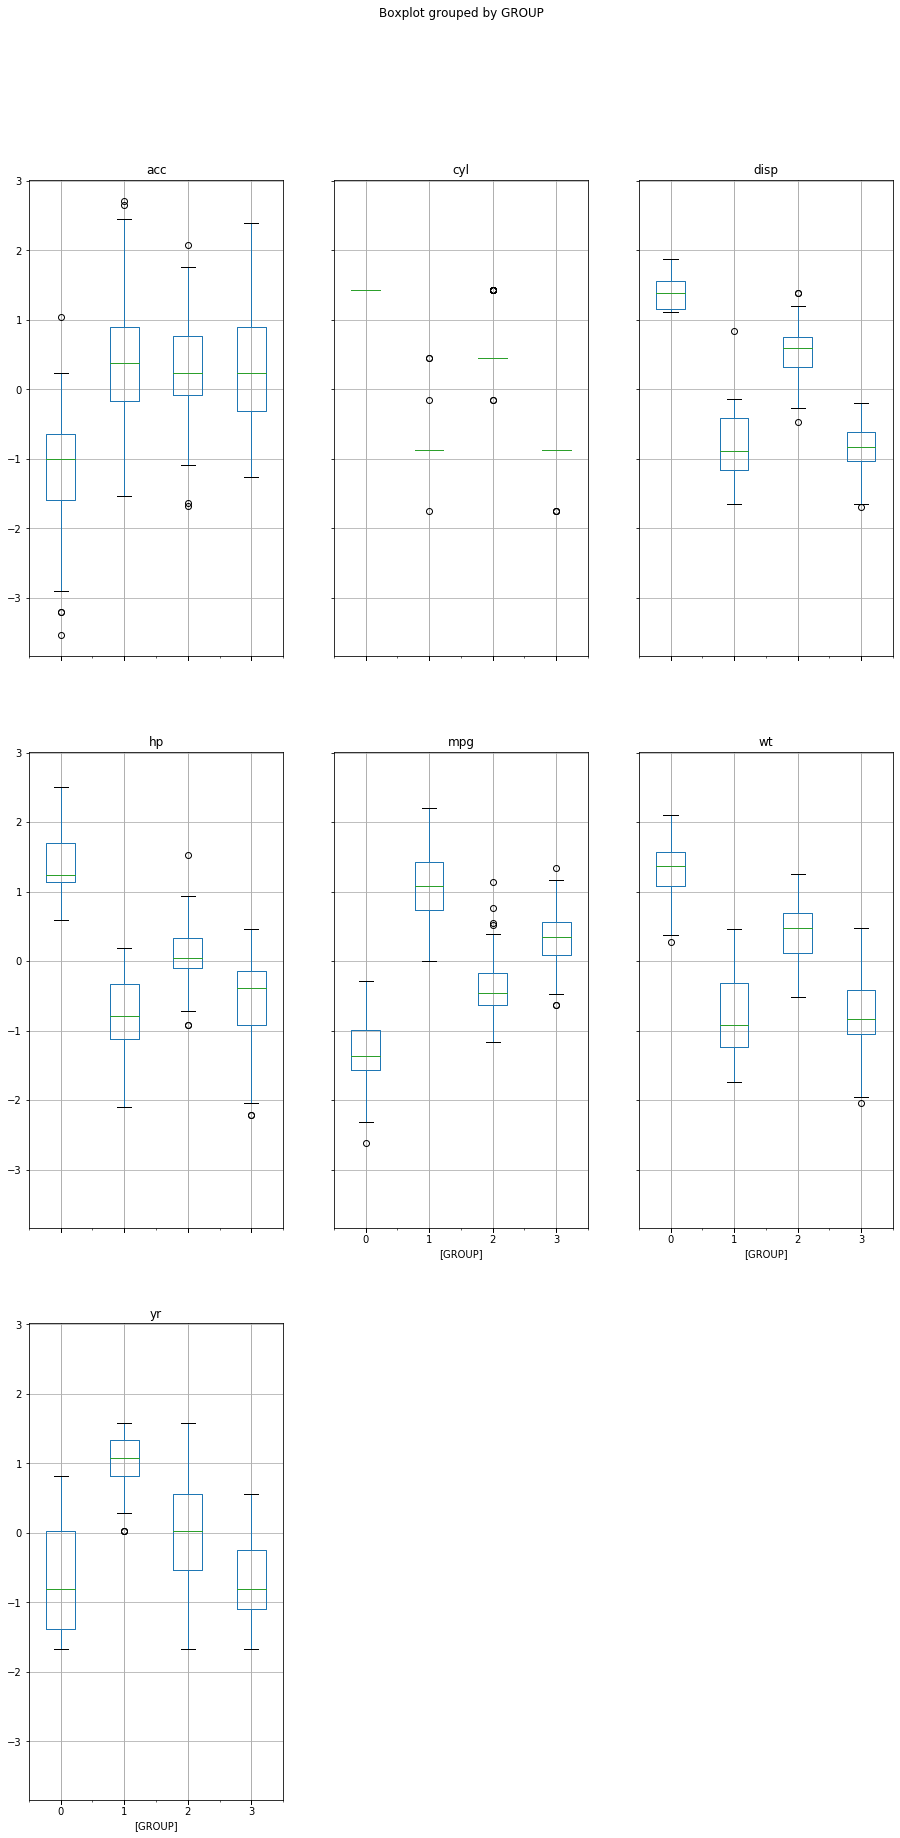

In [11]:
mpg_df_cluster = mpg_df_cluster.drop(['GROUP'],axis=1)
# Create K Means cluster and store the result in the object k_means
final_model=KMeans(4, random_state = 10)
# Fit K means on the scaled_df
final_model.fit(mpg_df_cluster)
prediction=final_model.predict(mpg_df_cluster)
mpg_df_cluster["GROUP"] =  prediction
mpg_df_cluster.boxplot(by = 'GROUP',  figsize=(15, 30))
mpg_df['GROUP'] = prediction

In [12]:
mpg_df_cluster.GROUP.value_counts().sort_index()

0     94
1    118
2     93
3     93
Name: GROUP, dtype: int64

In [13]:
clust_profile=mpg_df.groupby('GROUP').mean()
clust_profile['freq']=mpg_df.GROUP.value_counts().sort_index()
clust_profile

,cyl,disp,hp,wt,acc,yr,mpg,freq
GROUP,,,,,,,,
0,8.000000,350.042553,162.393617,4157.978723,12.576596,73.468085,14.429787,94
1,4.033898,111.957627,75.847458,2321.347458,16.700847,79.966102,32.407627,118
2,6.172043,224.333333,102.983871,3245.182796,16.319355,76.107527,19.791398,93
3,3.967742,107.586022,83.016129,2318.903226,16.403226,73.462366,25.136559,93


In [14]:
# Observations
# Group 0: on an average 8 cylinders, lowest acceleration, highest displacement, highest horsepower, 
# highest weight and lowest mpg - SUV/Luxury Cars

# Group 1: on an average 4 cylinders, highest acceleration, Lower displacement, less horsepower 
# and less weight with highest mpg - Small cars(Model 1)

# GROUP 2:on an average 6 cyclinders, Higher acceleration, higher displacement, higher horsepower, 
# higher weight and lower mpg - SEDAN Cars/MUV

# Group 3: on an average 4 cylinders, higher acceleration, Lowest displacement, lesser horsepower 
# and less weight with higher mpg - Small cars(Model 2)

# we will perform silhouette analysis to identify optimal clusters

In [15]:
from sklearn.metrics import silhouette_samples, silhouette_score

Automatically created module for IPython interactive environment
For n_clusters = 3 The average silhouette_score is : 0.402446344986957


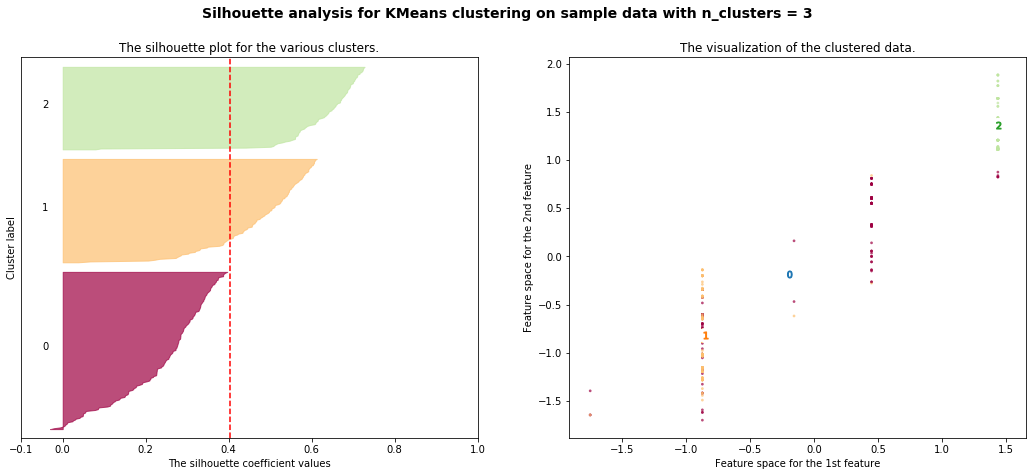

For n_clusters = 4 The average silhouette_score is : 0.45423660178418135


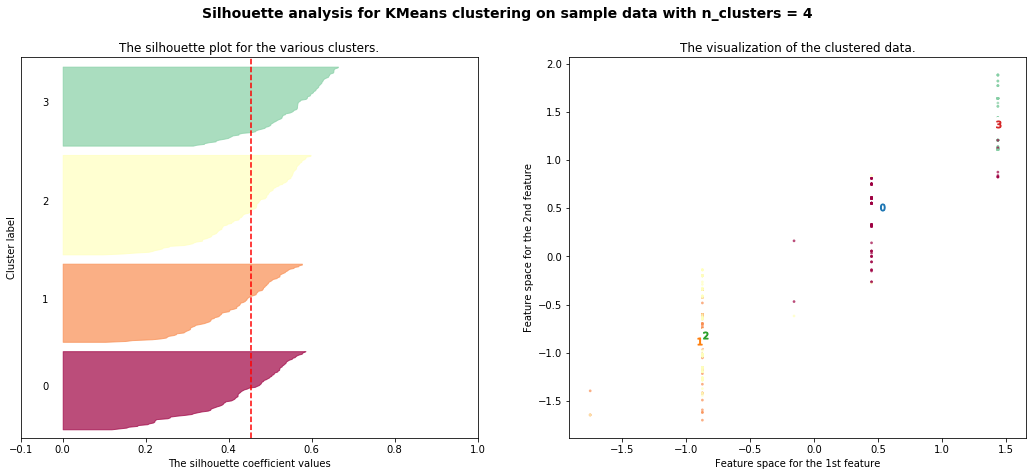

For n_clusters = 5 The average silhouette_score is : 0.4004621198837033


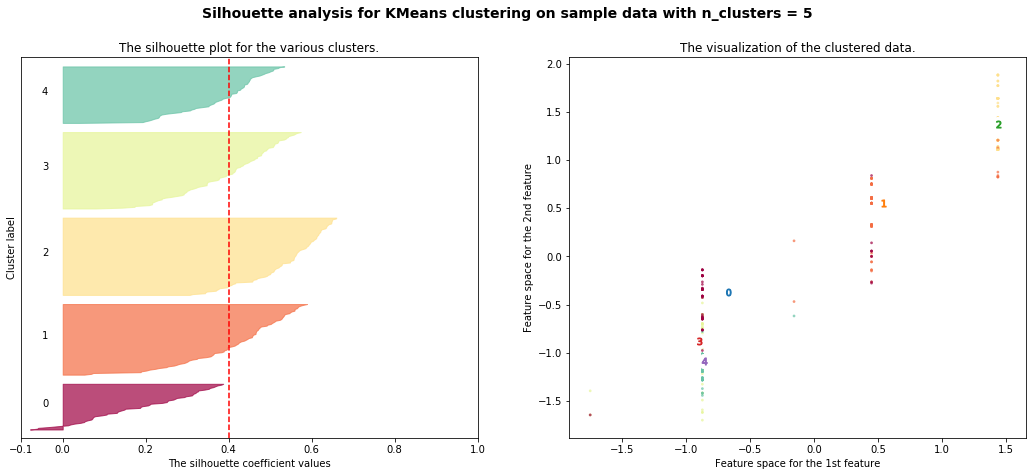

For n_clusters = 6 The average silhouette_score is : 0.3406648836408298


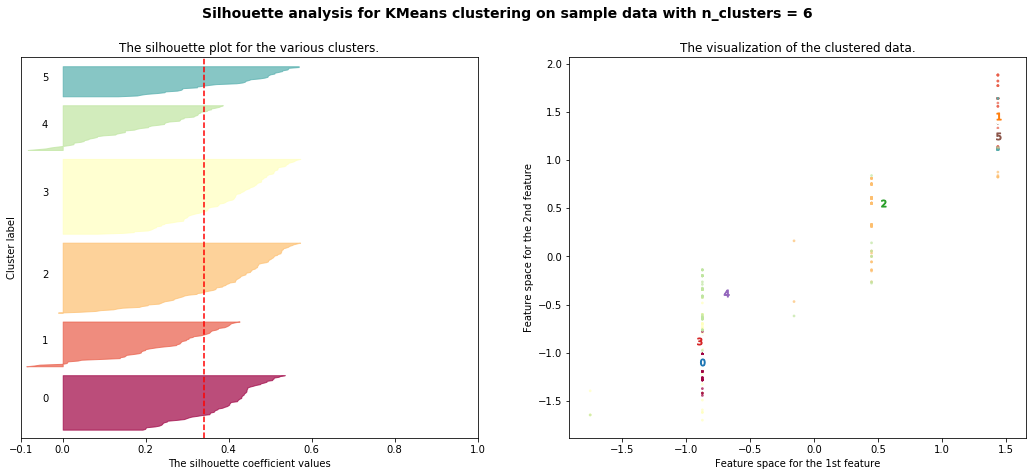

For n_clusters = 7 The average silhouette_score is : 0.312266877935896


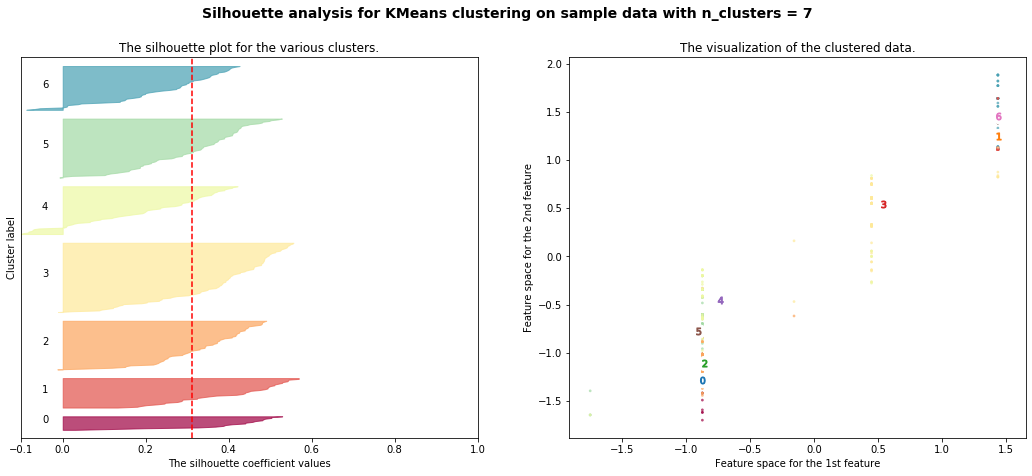

For n_clusters = 8 The average silhouette_score is : 0.2944594881786428


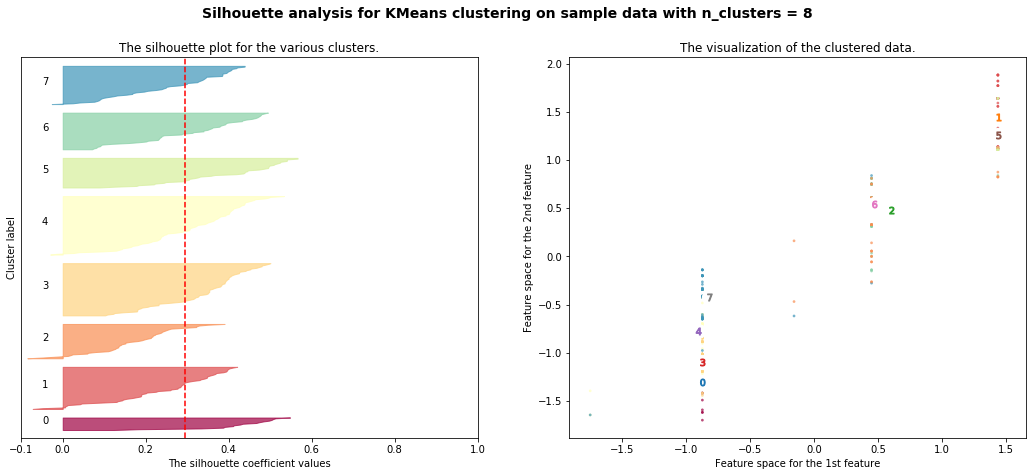

For n_clusters = 9 The average silhouette_score is : 0.2956524851909979


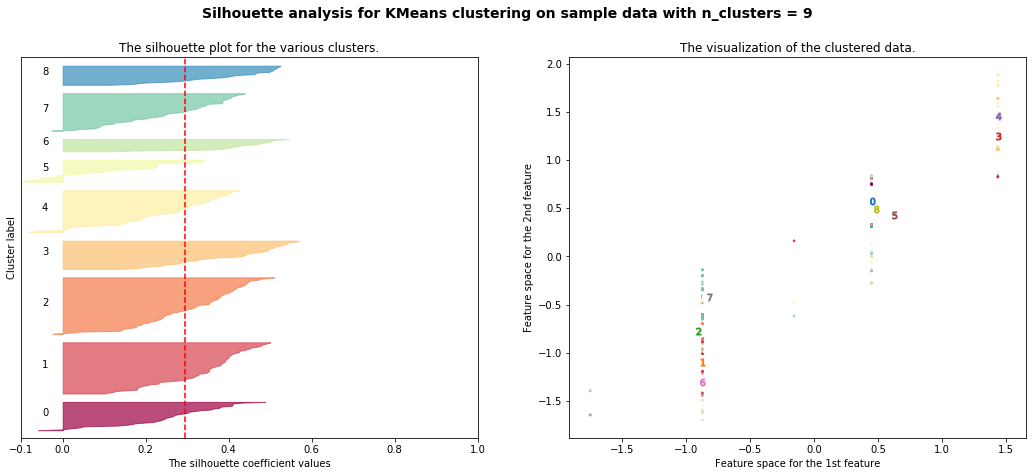

For n_clusters = 10 The average silhouette_score is : 0.27675254805641814


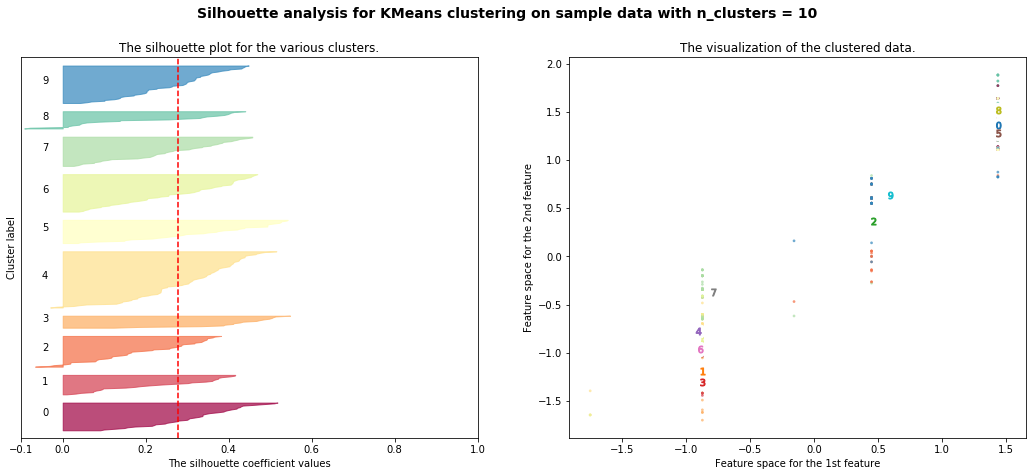

In [16]:
# Calculating silhouette_score
# The below function is from Sklearn for the Silhouette scores - Cluster Analysis ( Kmeans)
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

X=mpg_df_cluster.values

range_n_clusters = [3,4,5,6,7,8,9,10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [17]:
# Observations:
# For n_clusters = 4 The average silhouette_score is : 0.4542
# Based on the Visual analysis, Elbow method and Silhouette scores for Kmeans; the optimal number of clusters is 4

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Hierarchical Clustering - Dendogram Analysis

In [18]:
# Using ward linkage method for Dendograms
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(mpg_df_cluster, method='ward', metric='euclidean', optimal_ordering=True)

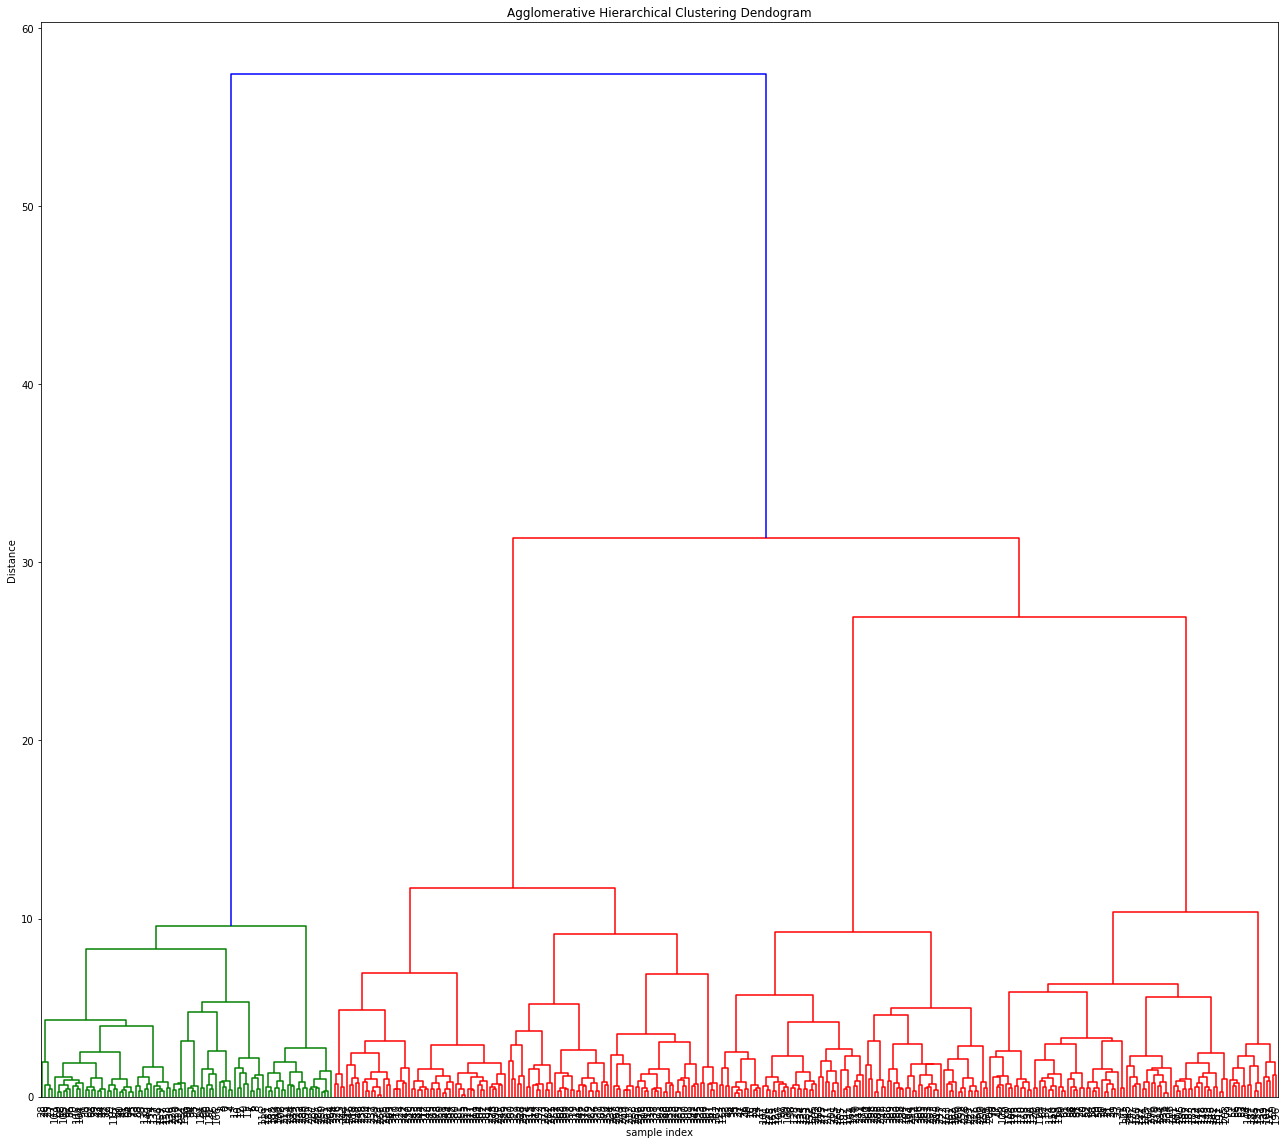

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

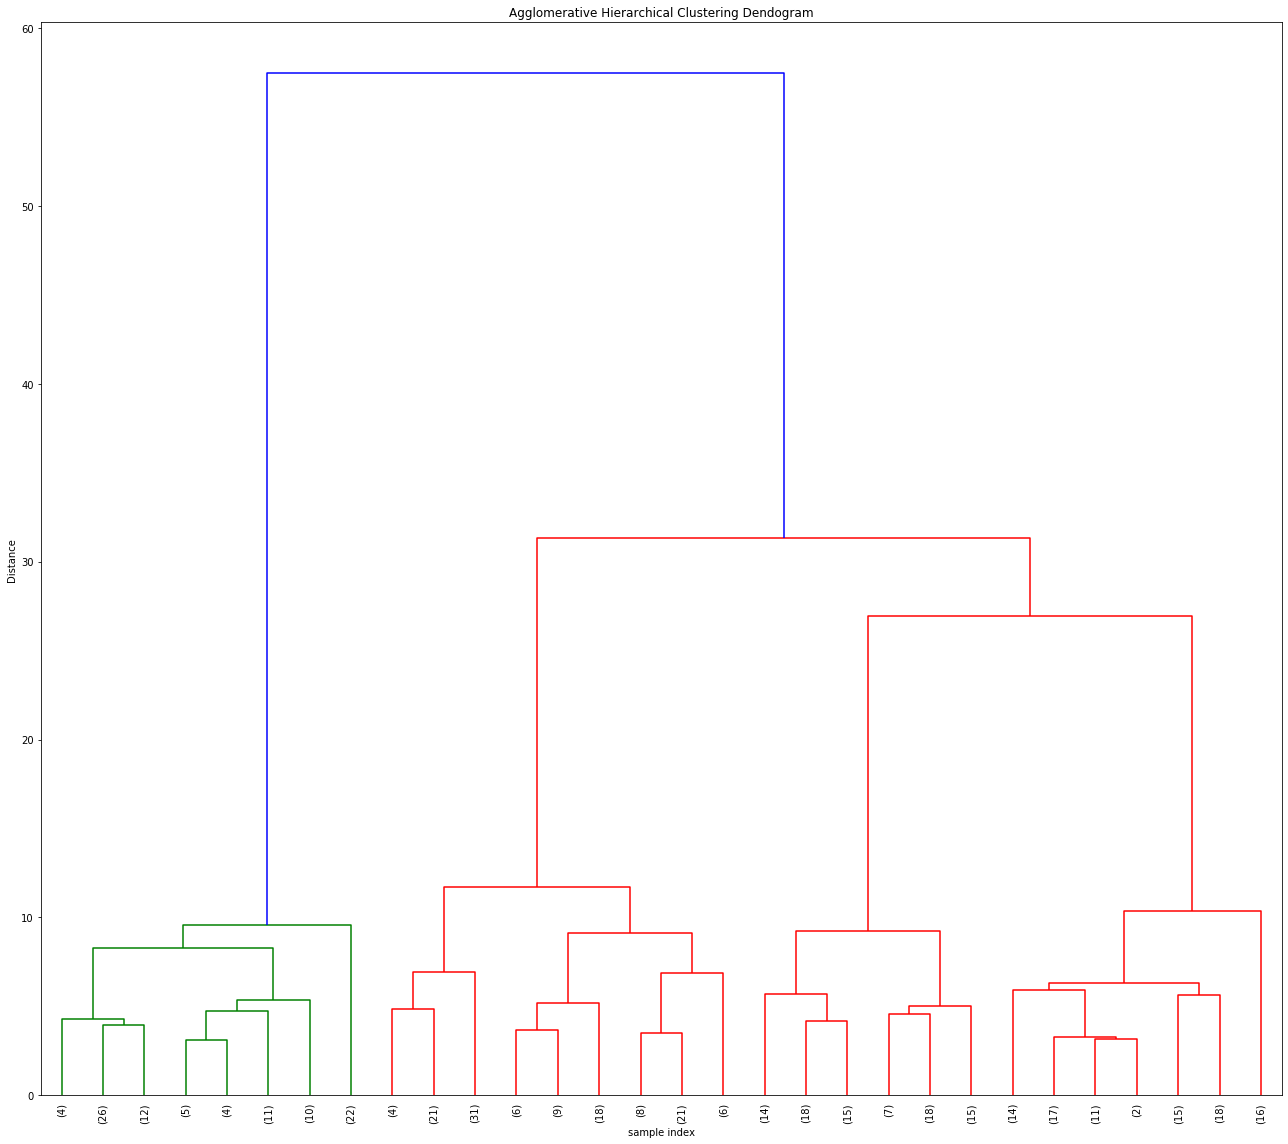

In [20]:
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='lastp')
plt.tight_layout()

In [21]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
c, coph_dists = cophenet(Z , pdist(mpg_df_cluster))
# closer it is to 1, the better is the clustering
c, coph_dists

(0.8167940601382235,
 array([0.84923377, 0.89379214, 0.54902288, ..., 9.10818693, 9.10818693,
        0.42047041]))

In [22]:
# Identifying the Maximum distance and plotting them in the Dendogram for finding optimal clusters
# Credits: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

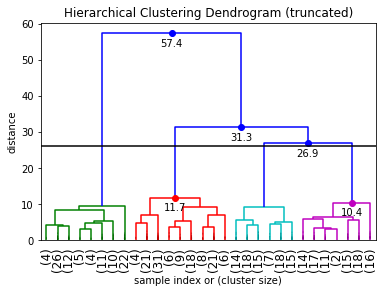

In [23]:
max_d = 26
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line which determines the total number of Clusters
)
plt.show()

In [24]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 3, 1, 1, 1, 1, 4, 4, 4, 4, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 4, 1, 1, 1, 1, 3, 4, 4,
       4, 4, 4, 3, 4, 1, 1, 4, 4, 4, 4, 1, 4, 3, 1, 3, 3, 3, 3, 4, 4, 4,
       4, 3, 3, 3, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3,
       3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 4, 4, 3, 4, 4, 4, 4, 3, 4,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 3, 3, 3, 3, 2, 4, 4,
       2, 3, 3, 3, 3, 4, 2, 4, 4, 4, 1, 4, 3, 3, 1, 1, 1, 1, 2, 2, 2, 4,
       2, 1, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 2, 4, 2, 4, 2, 2, 2, 2, 3,
       4, 4, 2, 2, 2, 2, 2, 3, 1, 1, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 3,
       1, 1, 2, 2, 2, 2, 4, 2, 2, 2, 3, 3, 4, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       1, 1, 3, 1, 1, 3, 1, 2, 2, 2, 2, 3, 3, 2, 3,

In [25]:
# Observations:
# Based on the dendogram and fcluster Analysis the optimal clusters using ward linkage method = 4
# Hence, optimal clusters will be 4

In [26]:
# Performing Agglomerative Clustering based on the Dendogram Analysis
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='ward')
model.fit(mpg_df_cluster)
mpg_df_cluster['GROUP'] = model.labels_
mpg_df['GROUP'] = model.labels_
mpg_df_cluster.groupby(["GROUP"]).count()

,cyl,disp,hp,wt,acc,yr,mpg
GROUP,,,,,,,
0,124,124,124,124,124,124,124
1,94,94,94,94,94,94,94
2,93,93,93,93,93,93,93
3,87,87,87,87,87,87,87


D:\Users\anand\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Users\anand\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


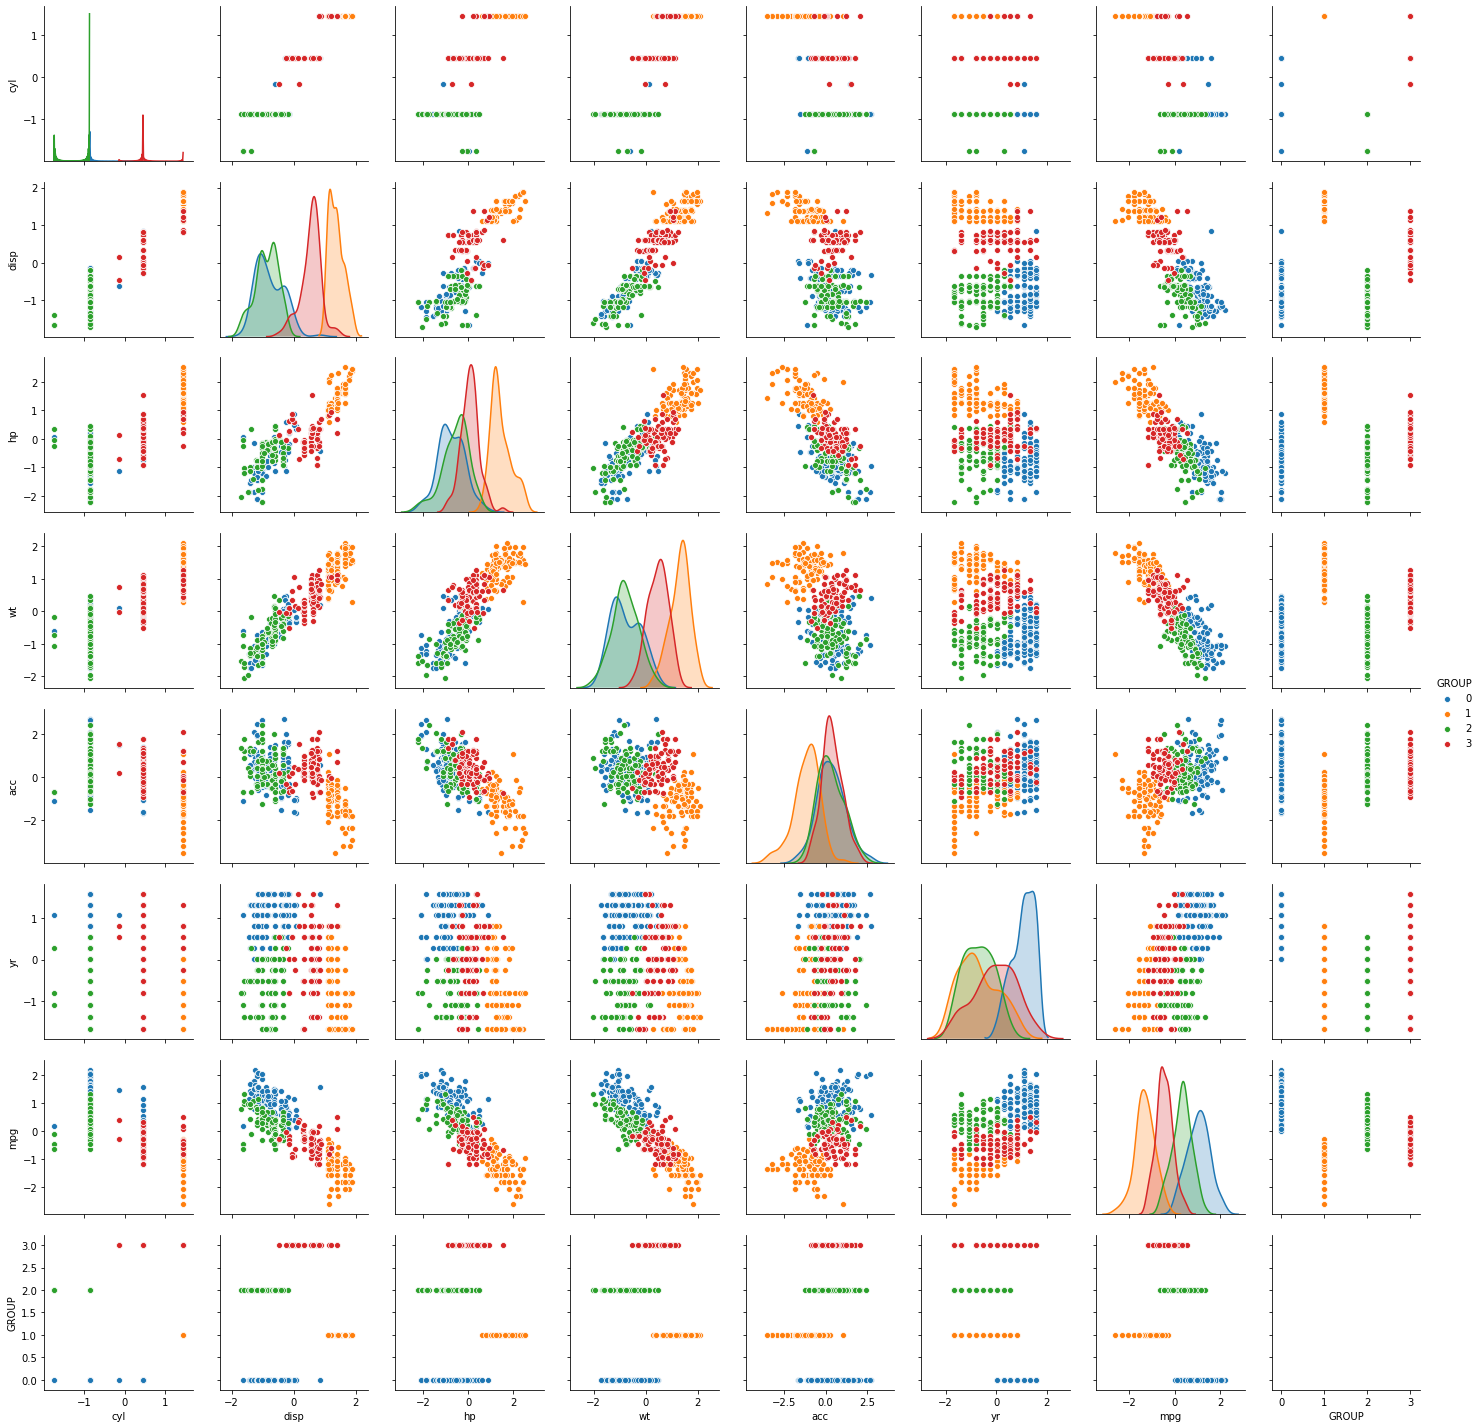

In [27]:
sns.pairplot(mpg_df_cluster, diag_kind='kde', hue = 'GROUP') 
# Pairplot to visualize the distribution after clustering of data

In [28]:
clust_profile=mpg_df.groupby('GROUP').mean()
clust_profile['freq']=mpg_df.GROUP.value_counts().sort_index()
clust_profile

,cyl,disp,hp,wt,acc,yr,mpg,freq
GROUP,,,,,,,,
0,4.129032,114.612903,77.887097,2344.185484,16.494355,79.975806,32.141129,124
1,8.000000,350.042553,162.393617,4157.978723,12.576596,73.468085,14.429787,94
2,3.967742,107.586022,83.016129,2318.903226,16.403226,73.462366,25.136559,93
3,6.183908,228.298851,101.948276,3276.344828,16.587356,75.827586,19.301149,87


In [29]:
# Based on HC;
# Group 0 on an average has around 4 cylinders, higher acceleration, lower displacement, less horsepower, 
# less weight and highest mpg manufactured in year '80 - Small Cars(Model 1)
# Group 1 on an average has 8 cylinders, lowest acceleration, highest displacement, highest horsepower, 
# highest weight and lowest mpg, manufactured in year '73 - SUV/Luxury cars
# Group 2 on an average has around 4 cylinders, higher acceleration, lower displacement, less horsepower, 
# less weight and higher mpg manufactured in year '73 - Small Cars(Model 2)
# Group 3 on an average has over 6 cylinders, higher acceleration, medium displacement, higher horsepower, 
# medium weight and relatively higher mpg manufactured in year '75 - SEDAN

In [30]:
# In k-means clustering, we try to identify the best way to divide the data into k sets simultaneously. 
# A good approach is to take k items from the data set as initial cluster representatives, 
# assign all items to the cluster whose representative is closest, 
# and then calculate the cluster mean as a new representative; 
# until it converges (all clusters stay the same).

# We then try to identify the optimal number of clusters using visual analysis(pair plot), Elbow method and 
# Silhouette analysis

In [31]:
# Hierarchical clustering builds clusters within clusters 
# and does not require a pre-specified number of clusters like k means

# In bottom-up hierarchical clustering(Dendogram, AgglomerativeClustering), 
# we start with each data item having its own cluster. 
# We then look for the two items that are most similar, and combine them in a larger cluster.
# We keep repeating until all the clusters we have left are too dissimilar to be gathered together, 
# or until we reach a preset number of cluster

# We first build a dendogram to identify the clusters visually and then find optimal number of clusters
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram

In [32]:
# The K-Means is generally used when the number of classes is fixed in advance, 
# while the HC is generally used for an unknown number of classes and helps to determine this optimal number
# Clustering algorithms use the distance in order to separate observations into different groups

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 4. Answer below questions based on outcomes of using ML based  methods 
    
1. Mention how many optimal clusters are there in the data and  what could be the possible reason behind it. ( 2 points)  
2. Use linear regression model on different clusters separately and  print the coefficients of the models individually (5 points)
3. How using different models for different clusters will be helpful  in this case and how it will be different than using one single  model without clustering? Mention how it impacts performance  and prediction. ( 3 points) 

In [33]:
# Observations- K-Means Clustering
# The elbow plot confirms our visual analysis that there is sharp decline in SSE beyond 3 clusters; optimal will be 3
# Based on the buidling Kmeans and Silhouette analysis for n_clusters = 3; silhouette analysis and score
# which reduces considerably beyond 4
# Hence, the optimal number of clusters is 4

In [34]:
# Observations - Hieararchical Clustering
# Using ward linkage method for Dendograms and Visual analysis; 
# cophenet index 0.81 which is a measure of the correlation between the distance of points in feature space 
# and distance on dendrogram with cut-off
# We can cut the distance at slighltly less than half the distance half of the total distance to get optimal clusters;
# Hence, optimal clusters based on analysis is 4

In [35]:
# Creating Dataframes for Each cluster and performing Modeling on each of the clusters
mpg_df_SC = mpg_df_cluster[mpg_df_cluster['GROUP']==0]
mpg_df_SC.shape

(124, 8)

In [36]:
mpg_df_SUV = mpg_df_cluster[mpg_df_cluster['GROUP']==1]
mpg_df_SUV.shape

(94, 8)

In [37]:
mpg_df_SC2 = mpg_df_cluster[mpg_df_cluster['GROUP']==2]
mpg_df_SC2.shape

(93, 8)

In [38]:
mpg_df_Sedan = mpg_df_cluster[mpg_df_cluster['GROUP']==3]
mpg_df_Sedan.shape

(87, 8)

In [39]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import math
def Performmodeling(data, model):
    y = data['mpg'] # Target Variable
    X = data.drop(['mpg'],axis=1) # Independent Variables
    # Train, test split to create the regression model
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20,random_state = 10)
    regr = linear_model.LinearRegression()
    regr.fit(X_train,y_train)
    model_df_1 = pd.DataFrame(regr.coef_).transpose()
    model_df_1.columns = data.columns[:-1]
    model_df_1['constant'] = regr.intercept_
    #Linear Regression equation is as follows,
    for idx, col_name in enumerate(model_df_1.columns[:-1]):
        print('The coefficient for {} is {}'.format(col_name, regr.coef_[idx]))
    r2_score= regr.score(X_test,y_test)
    mse = np.mean((regr.predict(X_test)-y_test)**2)
    rmse = math.sqrt(mse)
    y_pred = regr.predict(X_test)
    model_df_1['R-Squared'] = r2_score
    model_df_1['RMSE'] = rmse
    model_df_1['Cluster_Label'] = model
    return data, model_df_1

In [40]:
# Linear Model for Entire data without clusters
regr_df = pd.DataFrame()
Finalmodel,df1 = Performmodeling(mpg_df_cluster,'Complete')
regr_df.append([df1],ignore_index = True)

The coefficient for cyl is -0.03423683471314753
The coefficient for disp is -0.04102623543414885
The coefficient for hp is -0.2497884681718083
The coefficient for wt is -0.5143879765653397
The coefficient for acc is -0.05202530727997876
The coefficient for yr is 0.27987268076080746
The coefficient for mpg is -0.0917692051346767


,cyl,disp,hp,wt,acc,yr,mpg,constant,R-Squared,RMSE,Cluster_Label
0,-0.034237,-0.041026,-0.249788,-0.514388,-0.052025,0.279873,-0.091769,0.13771,0.865519,0.368595,Complete


In [41]:
# Linear Model for Small Cars (Model 1) - Cluster 0
Finalmodel, df2 = Performmodeling(mpg_df_SC, 'Small Cars(Model 1)')
regr_df.append([df2],ignore_index = True)

The coefficient for cyl is 0.30339964597310426
The coefficient for disp is -0.05930598507157209
The coefficient for hp is -0.4038242136235132
The coefficient for wt is -0.3506256335715247
The coefficient for acc is -0.008683416155602945
The coefficient for yr is 0.34575625273383265
The coefficient for mpg is 0.0


,cyl,disp,hp,wt,acc,yr,mpg,constant,R-Squared,RMSE,Cluster_Label
0,0.3034,-0.059306,-0.403824,-0.350626,-0.008683,0.345756,0.0,0.311159,0.591373,0.304641,Small Cars(Model 1)


In [42]:
# Linear Model for SUV/Luxury Cars - Cluster 1
Finalmodel, df3 = Performmodeling(mpg_df_SUV, 'SUV/Luxury Cars')
regr_df.append([df3],ignore_index = True)

The coefficient for cyl is 0.0
The coefficient for disp is -0.1983800179521238
The coefficient for hp is -0.3442097725979941
The coefficient for wt is -0.16857480350844525
The coefficient for acc is -0.2691278904728712
The coefficient for yr is 0.25733788354264825
The coefficient for mpg is 0.0


,cyl,disp,hp,wt,acc,yr,mpg,constant,R-Squared,RMSE,Cluster_Label
0,0.0,-0.19838,-0.34421,-0.168575,-0.269128,0.257338,0.0,-0.436119,0.600325,0.254348,SUV/Luxury Cars


In [43]:
# Linear Model for small cars (Model 2) - Cluster 2
Finalmodel, df4 = Performmodeling(mpg_df_SC2, 'Small Cars(Model 2)')
regr_df.append([df4],ignore_index = True)

The coefficient for cyl is 1.2413020270245538
The coefficient for disp is -0.3254464447765659
The coefficient for hp is -0.12769699874657878
The coefficient for wt is -0.40240752841130967
The coefficient for acc is -0.1374908976504602
The coefficient for yr is 0.11014632436578771
The coefficient for mpg is 0.0


,cyl,disp,hp,wt,acc,yr,mpg,constant,R-Squared,RMSE,Cluster_Label
0,1.241302,-0.325446,-0.127697,-0.402408,-0.137491,0.110146,0.0,0.895626,0.553759,0.259912,Small Cars(Model 2)


In [44]:
# Linear Model for Sedan Cars - Cluster 3
Finalmodel, df5 = Performmodeling(mpg_df_Sedan,'Sedan Cars')
regr_df.append([df5],ignore_index = True)

The coefficient for cyl is 0.17178011850043615
The coefficient for disp is 0.035919100723002584
The coefficient for hp is -0.136901814698646
The coefficient for wt is -0.4505225060955475
The coefficient for acc is -0.04452106450229039
The coefficient for yr is 0.2188106362820709
The coefficient for mpg is 0.0


,cyl,disp,hp,wt,acc,yr,mpg,constant,R-Squared,RMSE,Cluster_Label
0,0.17178,0.035919,-0.136902,-0.450523,-0.044521,0.218811,0.0,-0.328448,0.386825,0.194321,Sedan Cars


In [45]:
regr_df.append([df1,df2,df3,df4,df5],ignore_index = True)

,cyl,disp,hp,wt,acc,yr,mpg,constant,R-Squared,RMSE,Cluster_Label
0,-0.034237,-0.041026,-0.249788,-0.514388,-0.052025,0.279873,-0.091769,0.137710,0.865519,0.368595,Complete
1,0.303400,-0.059306,-0.403824,-0.350626,-0.008683,0.345756,0.000000,0.311159,0.591373,0.304641,Small Cars(Model 1)
2,0.000000,-0.198380,-0.344210,-0.168575,-0.269128,0.257338,0.000000,-0.436119,0.600325,0.254348,SUV/Luxury Cars
3,1.241302,-0.325446,-0.127697,-0.402408,-0.137491,0.110146,0.000000,0.895626,0.553759,0.259912,Small Cars(Model 2)
4,0.171780,0.035919,-0.136902,-0.450523,-0.044521,0.218811,0.000000,-0.328448,0.386825,0.194321,Sedan Cars


In [46]:
# Observations
# Linear regression Model performs better with complete data - 0.86 higher r-squared value and better prediction
# than clustered data - Small cars - Model 1, SUV, Small cars(Model 2) and Sedan Cars
# Ideally, Clustering did not help with improved model performance